Seed:  3426


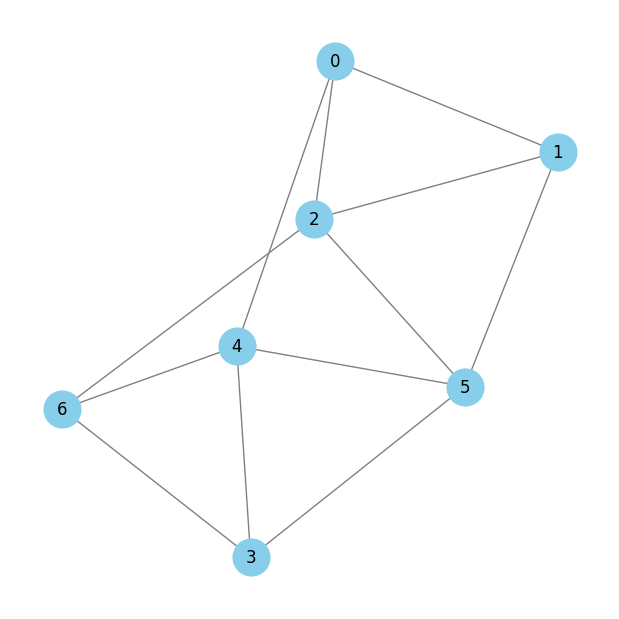

True
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}


In [1]:
### CREATE A RANDOM GRAPH G ###

import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate a random seed first
seed_value = random.randint(0, 10000)  # Random seed between 0 and 10000
random.seed(seed_value)
print("Seed: ", seed_value)

# Parameters
n = 7 # Number of nodes
p = 0.35 # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()
print(nx.is_connected(G))

# Assign labels to nodes based on their connected component
component_labels = {node: i for i, component in enumerate(nx.connected_components(G)) for node in component}

# Print node labels
print(component_labels)

In [2]:
### CREATE SPANNING TREE ###

import networkx as nx
import random

# Select a random starting node
random_node = random.choice(list(G.nodes))

# Get a spanning tree using DFS
spanning_tree = nx.dfs_tree(G, source=random_node)

# Convert spanning tree to an undirected graph
spanning_tree_undirected = nx.Graph(spanning_tree)

print(spanning_tree_undirected.edges())

[(5, 1), (1, 0), (0, 2), (2, 6), (6, 3), (3, 4)]


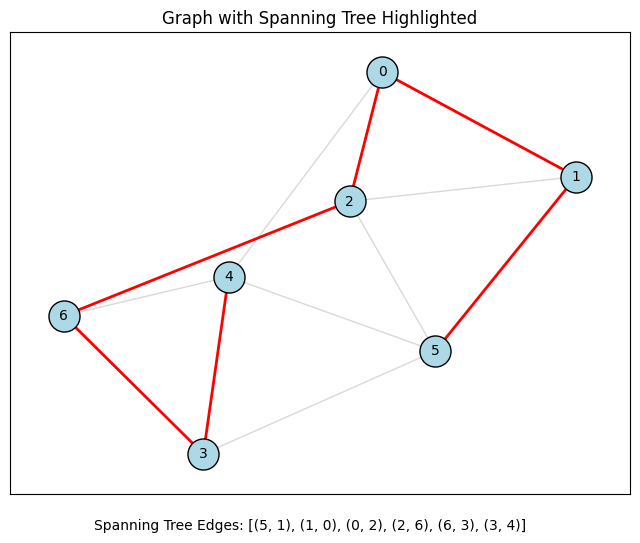

In [3]:
### PRINT SPANNING TREE ###

def plot_spanning_tree(G, spanning_tree):
    """Plot the original graph and highlight the undirected spanning tree edges."""
    
    pos = nx.spring_layout(G)  # Compute layout for nodes

    plt.figure(figsize=(8, 6))

    # Draw the original graph edges first (background edges)
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.3, width=1)

    # Draw spanning tree edges in red
    nx.draw_networkx_edges(spanning_tree, pos, edge_color="red", width=2)

    # Draw nodes on top of edges
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", edgecolors="black", node_size=500)

    # Draw labels on top
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    plt.title("Graph with Spanning Tree Highlighted")

    # Add subtitle below the graph listing the spanning tree edges
    spanning_tree_edges = list(spanning_tree.edges())
    subtitle = f"Spanning Tree Edges: {spanning_tree_edges}"
    plt.figtext(0.5, 0.05, subtitle, wrap=True, horizontalalignment='center', fontsize=10)
    
    plt.show()



# Plot the graph with the spanning tree highlighted
plot_spanning_tree(G, spanning_tree_undirected)

In [4]:
### GENERATE SET OF FUNDAMENTAL CYCLES ###

import networkx as nx
import random

# Ensure spanning tree edges are treated as undirected
spanning_tree_edges = set(spanning_tree_undirected.edges())

# Find edges not in the spanning tree (back edges)
generating_edges = [(u, v) for u, v in G.edges() if (u, v) not in spanning_tree_edges and (v, u) not in spanning_tree_edges]

print("Generating edges:", generating_edges)
print("All Graph Edges:", list(G.edges()))
print("Spanning Tree Edges:", list(spanning_tree_undirected.edges()))

# Find the fundamental set of cycles
fundamental_cycles = []
for u, v in generating_edges:
    print(u, v)
    # Find the path in the spanning tree between u and v
    path = nx.shortest_path(spanning_tree_undirected, source=u, target=v)
    cycle = path + [u]  # Complete the cycle
    print(f"Edge ({u}, {v}) generates cycle: {cycle}")
    fundamental_cycles.append(cycle)

# Print fundamental cycles
for i, cycle in enumerate(fundamental_cycles):
    print(f"Cycle {i+1}: {cycle} (generated by edge {generating_edges[i]})")


Generating edges: [(0, 4), (1, 2), (2, 5), (3, 5), (4, 5), (4, 6)]
All Graph Edges: [(0, 1), (0, 2), (0, 4), (1, 2), (1, 5), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6)]
Spanning Tree Edges: [(5, 1), (1, 0), (0, 2), (2, 6), (6, 3), (3, 4)]
0 4
Edge (0, 4) generates cycle: [0, 2, 6, 3, 4, 0]
1 2
Edge (1, 2) generates cycle: [1, 0, 2, 1]
2 5
Edge (2, 5) generates cycle: [2, 0, 1, 5, 2]
3 5
Edge (3, 5) generates cycle: [3, 6, 2, 0, 1, 5, 3]
4 5
Edge (4, 5) generates cycle: [4, 3, 6, 2, 0, 1, 5, 4]
4 6
Edge (4, 6) generates cycle: [4, 3, 6, 4]
Cycle 1: [0, 2, 6, 3, 4, 0] (generated by edge (0, 4))
Cycle 2: [1, 0, 2, 1] (generated by edge (1, 2))
Cycle 3: [2, 0, 1, 5, 2] (generated by edge (2, 5))
Cycle 4: [3, 6, 2, 0, 1, 5, 3] (generated by edge (3, 5))
Cycle 5: [4, 3, 6, 2, 0, 1, 5, 4] (generated by edge (4, 5))
Cycle 6: [4, 3, 6, 4] (generated by edge (4, 6))


In [5]:
bridges = {}
for c in fundamental_cycles:
    print(c)
    bridges[tuple(c)] = []
    G_no_c = G.copy()
    G_no_c.remove_edges_from([(c[i], c[i+1]) for i in range(len(c)-1)])
    

[0, 2, 6, 3, 4, 0]
[1, 0, 2, 1]
[2, 0, 1, 5, 2]
[3, 6, 2, 0, 1, 5, 3]
[4, 3, 6, 2, 0, 1, 5, 4]
[4, 3, 6, 4]


Processing cycle: [0, 2, 6, 3, 4, 0]
Bridges: [{'edges': [(0, 1), (1, 2), (1, 5), (5, 2), (5, 3), (5, 4)], 'att_ver': {0, 2, 3, 4}}, {'edges': [(4, 6)], 'att_ver': {4, 6}}]


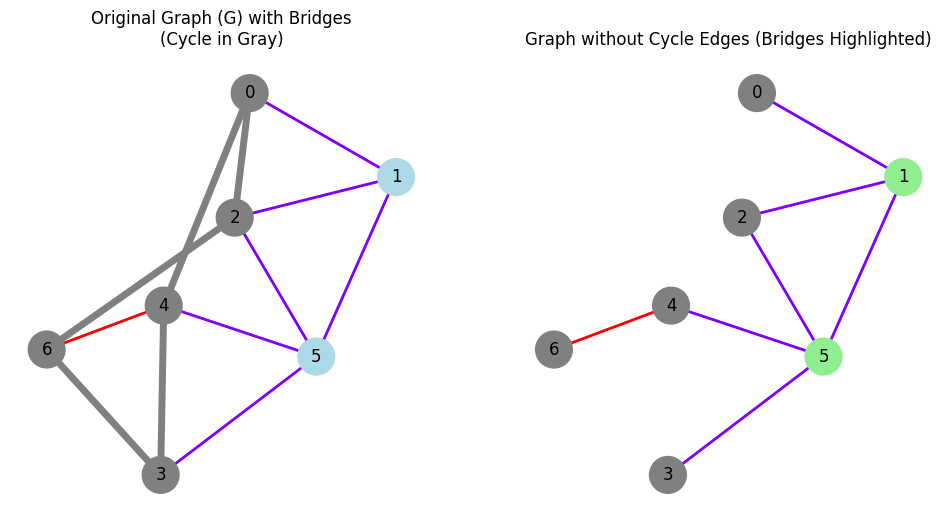

Processing cycle: [1, 0, 2, 1]
Bridges: [{'edges': [(0, 4), (4, 3), (4, 5), (4, 6), (3, 5), (3, 6), (5, 1), (5, 2), (6, 2)], 'att_ver': {0, 1, 2}}]


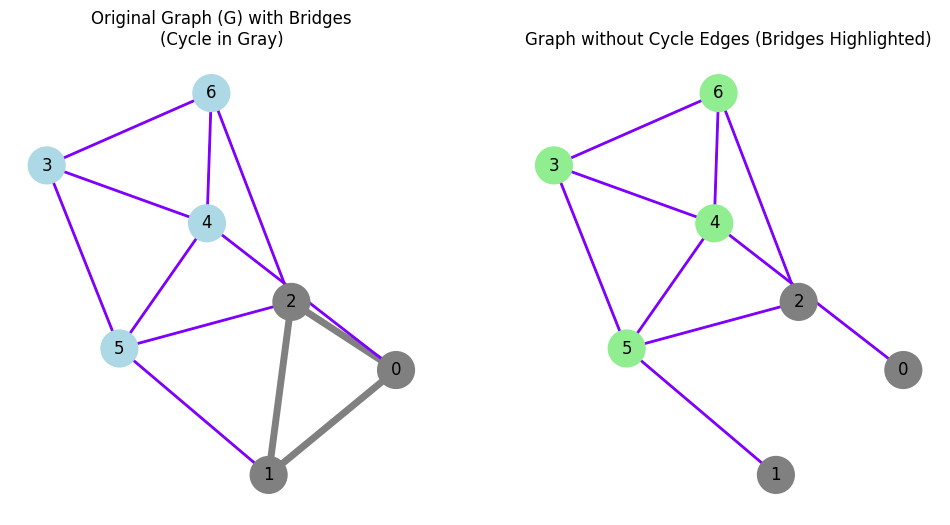

Processing cycle: [2, 0, 1, 5, 2]
Bridges: [{'edges': [(0, 4), (4, 3), (4, 5), (4, 6), (3, 5), (3, 6), (6, 2)], 'att_ver': {0, 2, 5}}, {'edges': [(1, 2)], 'att_ver': {1, 2}}]


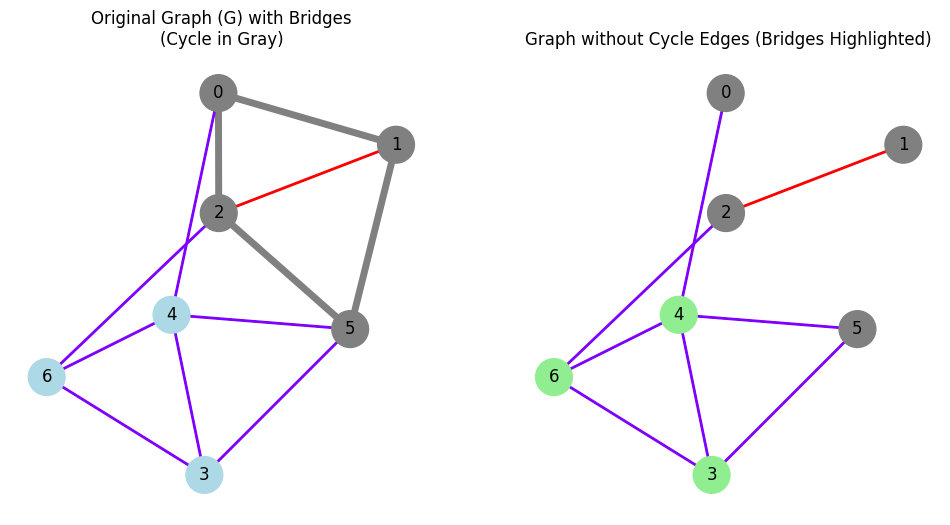

Processing cycle: [3, 6, 2, 0, 1, 5, 3]
Bridges: [{'edges': [(0, 4), (4, 3), (4, 5), (4, 6)], 'att_ver': {0, 3, 5, 6}}, {'edges': [(1, 2)], 'att_ver': {1, 2}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}]


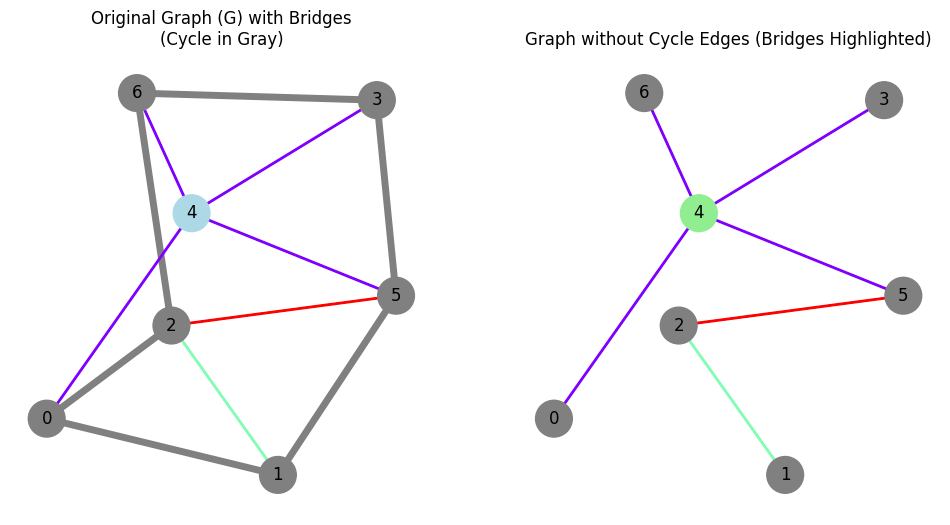

Processing cycle: [4, 3, 6, 2, 0, 1, 5, 4]
Bridges: [{'edges': [(0, 4)], 'att_ver': {0, 4}}, {'edges': [(1, 2)], 'att_ver': {1, 2}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(3, 5)], 'att_ver': {3, 5}}, {'edges': [(4, 6)], 'att_ver': {4, 6}}]


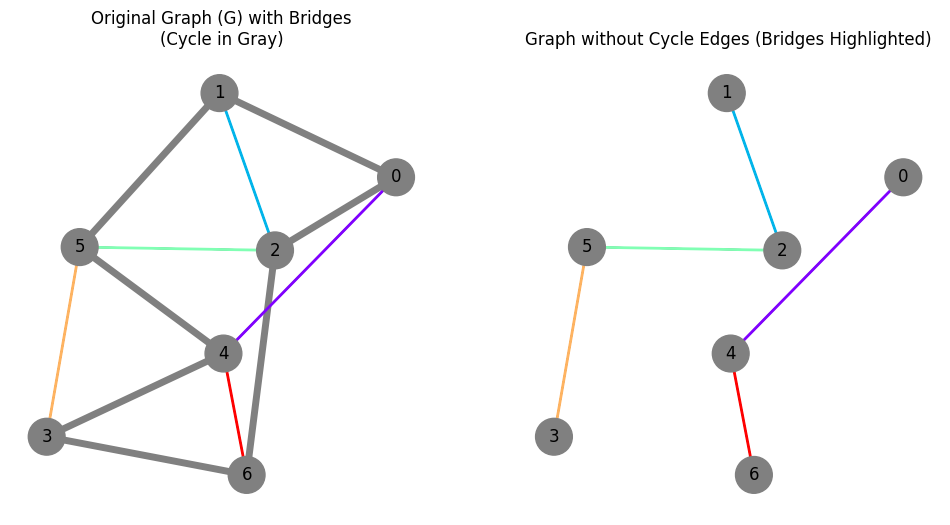

Processing cycle: [4, 3, 6, 4]
Bridges: [{'edges': [(0, 1), (0, 2), (0, 4), (1, 2), (1, 5), (2, 5), (2, 6), (5, 3), (5, 4)], 'att_ver': {3, 4, 6}}]


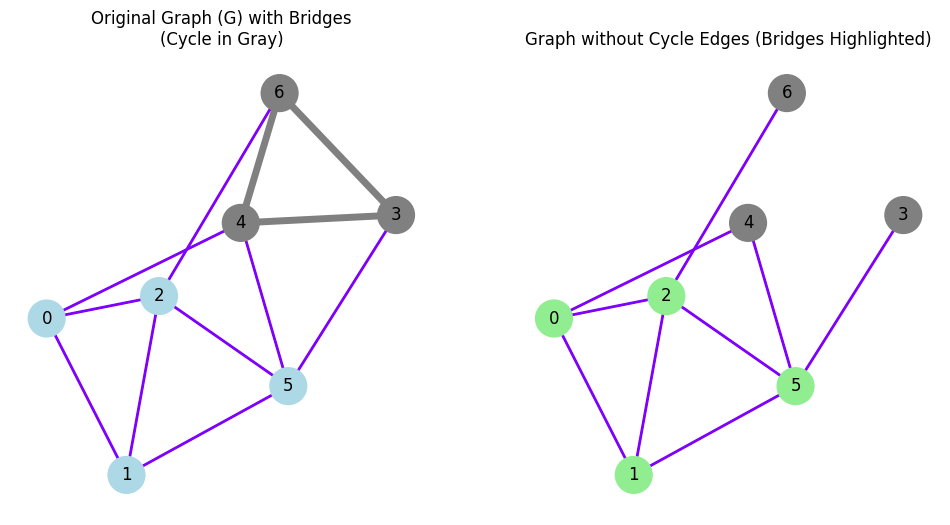

{(0, 2, 6, 3, 4, 0): [{'edges': [(0, 1), (1, 2), (1, 5), (5, 2), (5, 3), (5, 4)], 'att_ver': {0, 2, 3, 4}}, {'edges': [(4, 6)], 'att_ver': {4, 6}}], (1, 0, 2, 1): [{'edges': [(0, 4), (4, 3), (4, 5), (4, 6), (3, 5), (3, 6), (5, 1), (5, 2), (6, 2)], 'att_ver': {0, 1, 2}}], (2, 0, 1, 5, 2): [{'edges': [(0, 4), (4, 3), (4, 5), (4, 6), (3, 5), (3, 6), (6, 2)], 'att_ver': {0, 2, 5}}, {'edges': [(1, 2)], 'att_ver': {1, 2}}], (3, 6, 2, 0, 1, 5, 3): [{'edges': [(0, 4), (4, 3), (4, 5), (4, 6)], 'att_ver': {0, 3, 5, 6}}, {'edges': [(1, 2)], 'att_ver': {1, 2}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}], (4, 3, 6, 2, 0, 1, 5, 4): [{'edges': [(0, 4)], 'att_ver': {0, 4}}, {'edges': [(1, 2)], 'att_ver': {1, 2}}, {'edges': [(2, 5)], 'att_ver': {2, 5}}, {'edges': [(3, 5)], 'att_ver': {3, 5}}, {'edges': [(4, 6)], 'att_ver': {4, 6}}], (4, 3, 6, 4): [{'edges': [(0, 1), (0, 2), (0, 4), (1, 2), (1, 5), (2, 5), (2, 6), (5, 3), (5, 4)], 'att_ver': {3, 4, 6}}]}


In [6]:



### TODO intentar repetir el algoritmo buscando primero componentes triconnexas quitando los edges del ciclo y después haciendo 
### tratamiento especial de aquellas que contienen algún nodo del ciclo, separando esas por el nodo del ciclo. Para ello se puede 
### Hacer DFS desde el nodo del ciclo en las componentes que tengan un ciclo y para cada vecino del nodo del ciclo asignar una nueva
### componente triconnexa distinta de la del resto de vecinos

import matplotlib.pyplot as plt
import networkx as nx

from collections import deque

bridges_all_cycles = {}
attachment_vertices_all_cycles = {}

def find_bridge(G, node, bridge, unvisited):
    print(node, bridge, unvisited)
    for neigh in G.neighbors(node):
        bridge.append(neigh)
        if neigh in unvisited:
            unvisited.remove(neigh)
        if neigh not in c:
            find_bridge(G, node, bridge, unvisited)
        
for c in fundamental_cycles:
    print("Processing cycle:", c)
    
    # Create a copy of the graph and remove cycle edges
    G_no_c_edges = G.copy()
    G_no_c_nodes = G.copy()
    G_no_c_edges.remove_edges_from([(c[i], c[i+1]) for i in range(len(c)-1)])
    G_no_c_nodes.remove_nodes_from(c)
    
    unvisited = list(G_no_c_edges.edges()) ## habría que poner los del ciclo?? para empezar no pero como visited?
    bridges = []
    attachment_vertices = []
    q = deque()
    # print("unvisited", unvisited)
    for edge1 in G_no_c_edges.edges():
        if edge1 in unvisited: ## TODO VER SI SE PUEDE MODIFICAR LA LISTA DINÁMICAMENTE, FORMANDO UN SOLO FOR AQUÍ EN VEZ DE IF Y FOR
            # print("edge", edge1)
            q.append(edge1)
            unvisited.remove(edge1)
            bridge = {"edges": [], "att_ver": set([])}
            bridge["edges"].append(edge1) 
            # attachment_vertices_bridge = set([]) ### ELIMINADO E INTRODUCIDO EN DICT
            while q:
                edge2 = q.popleft()  # Current edge being processed
                
                for node in edge2:
                    if node in c:
                        # attachment_vertices_bridge.add(node) ### ELIMINADO E INTRODUCIDO EN DICT
                        bridge["att_ver"].add(node)
                    else:                       
                        for neighbor in G_no_c_edges.neighbors(node): 
                            # print(v, "vecino:" ,neighbor)
                            new_edge = (node, neighbor) 
                            new_edge_rev = (neighbor, node)
                            # print(new_edge)
                            # print(unvisited)
                            if (new_edge in unvisited) or (new_edge_rev in unvisited) :  # Ensure it's unvisited and not in the cycle
                                # print("añadir")
                                if new_edge in unvisited:
                                    unvisited.remove(new_edge)
                                else:
                                    unvisited.remove(new_edge_rev)
                                if neighbor in c:
                                    # attachment_vertices_bridge.add(neighbor) ######
                                    bridge["att_ver"].add(neighbor)
                                else:
                                    q.append(new_edge)
                                bridge["edges"].append(new_edge)
                                
                # u, v = edge2  # Extract nodes from the edge
                # # Explore edges connected to `v`
                # if v not in c:
                #     for neighbor in G_no_c_edges.neighbors(v): 
                #         # print(v, "vecino:" ,neighbor)
                #         new_edge = (v, neighbor) 
                #         new_edge_rev = (neighbor, v)
                #         # print(new_edge)
                #         # print(unvisited)
                #         if (new_edge in unvisited) or (new_edge_rev in unvisited) :  # Ensure it's unvisited and not in the cycle
                #             # print("añadir")
                #             if new_edge in unvisited:
                #                 unvisited.remove(new_edge)
                #             else:
                #                 unvisited.remove(new_edge_rev)
                #             if neighbor not in c:
                #                 q.append(new_edge)
                #             bridge.append(new_edge)
    
                # # Explore edges connected to `u` (since undirected)
                # if u not in c:
                #     for neighbor in G_no_c_edges.neighbors(u):
                #         # print(u, "vecino:" ,neighbor)
                #         new_edge = (u, neighbor) 
                #         new_edge_rev = (neighbor, u)
                #         if (new_edge in unvisited) or (new_edge_rev in unvisited):  # Ensure it's unvisited and not in the cycle
                #             # print("añadir")
                #             if new_edge in unvisited:
                #                 unvisited.remove(new_edge)
                #             else:
                #                 unvisited.remove(new_edge_rev)
                #             if neighbor not in c:
                #                 q.append(new_edge)
                #             bridge.append(new_edge)
    
            bridges.append(bridge)  # Store the final edge-connected component
            # attachment_vertices.append(attachment_vertices_bridge)  ### ELIMINADO E INTRODUCIDO EN DICT
    print("Bridges:", bridges)
    bridges_all_cycles[tuple(c)] = bridges
    # attachment_vertices_all_cycles[tuple(c)] = attachment_vertices  ### ELIMINADO E INTRODUCIDO EN DICT
    
    #############################
    ### PLOT CYCLE AND GRAPH WO CYCLE ###
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import networkx as nx
    import numpy as np
    
    # Create a figure with two side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Generate a colormap with different colors for bridges **excluding gray**
    num_bridges = len(bridges)
    colors = cm.rainbow(np.linspace(0, 1, num_bridges))  # Get full rainbow range
    colors = [color for color in colors if not np.allclose(color[:3], [0.5, 0.5, 0.5])]  # Exclude gray
    
    # Layout for both graphs (ensures consistent node positions)
    pos = nx.spring_layout(G)
    
    ### LEFT GRAPH: ORIGINAL GRAPH (G) WITH CYCLE AND BRIDGES ###
    axes[0].set_title("Original Graph (G) with Bridges\n(Cycle in Gray)")
    
    # Define node colors: gray for cycle nodes, light blue for others
    node_colors = ["gray" if node in c else "lightblue" for node in G.nodes()]
    
    # Draw all nodes with specific colors
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_color=node_colors, node_size=700)
    
    # Draw all edges in black by default
    nx.draw_networkx_edges(G, pos, ax=axes[0], edge_color="black")
    
    # Highlight the cycle edges in **thicker gray**
    nx.draw_networkx_edges(G, pos, edgelist=[(c[i], c[i+1]) for i in range(len(c)-1)], edge_color="gray", ax=axes[0], width=5)
    
    # Draw each bridge in a different color (excluding gray)
    for bridge, color in zip(bridges, colors):
        nx.draw_networkx_edges(G, pos, edgelist=bridge["edges"], edge_color=[color], ax=axes[0], width=2)
    
    ### RIGHT GRAPH: MODIFIED GRAPH (G_no_c_edges) WITH BRIDGES ###
    axes[1].set_title("Graph without Cycle Edges (Bridges Highlighted)")
    
    # Define node colors: gray for cycle nodes, light green for others
    node_colors_no_cycle = ["gray" if node in c else "lightgreen" for node in G_no_c_edges.nodes()]
    
    # Draw all nodes
    nx.draw(G_no_c_edges, pos, ax=axes[1], with_labels=True, node_color=node_colors_no_cycle, node_size=700)
    
    # Draw all edges in black by default
    nx.draw_networkx_edges(G_no_c_edges, pos, ax=axes[1], edge_color="black")
    
    # Draw each bridge in a different color (excluding gray)
    for bridge, color in zip(bridges, colors):
        nx.draw_networkx_edges(G_no_c_edges, pos, edgelist=bridge["edges"], edge_color=[color], ax=axes[1], width=2)
    
    # Show the visualization
    plt.show()
    ### END PLOT CYCLE AND GRAPH WO CYCLE ###
    #############################

print(bridges_all_cycles)
# print(attachment_vertices_all_cycles)  ### ELIMINADO E INTRODUCIDO EN DICT

In [7]:
### 2-CNF solver ###

from itertools import combinations

# Asignamos índices únicos a las aristas del grafo
# edge_index_map = {edge: i for i, edge in enumerate(G.edges())} ### TODO VER DONDE CAMBIAN DE DIRECCIÓN LOS EDGES Y USAR ESTE INDEX MAP
# Assign unique indices to edges in the order they appear in G.edges(), w1ith both orientations stored
edge_index_map = {}
for i, edge in enumerate(G.edges()):
    edge_index_map[edge] = i
    edge_index_map[(edge[1], edge[0])] = i  # Store reversed edge as well

print(edge_index_map)

cycle_index_map = {}
for i, c in enumerate(fundamental_cycles):
    cycle_index_map[tuple(c)] = i

# Estructura CNF_lists basada en edges
CNF_lists = [[[set([]) for _ in range(4)] for _ in range(len(fundamental_cycles))] for _ in range(len(G.edges()))]
# 0 PP
# 1 PN
# 2 NP
# 3 NN

# Condition a)
for c_index, c in enumerate(fundamental_cycles):
    for bridge in bridges_all_cycles[tuple(c)]:
        for edge1, edge2 in combinations(bridge["edges"], 2):  # Usamos directamente las aristas del puente
            e1, e2 = edge_index_map[edge1], edge_index_map[edge2] ### TODO PENSAR SI ES MEJOR METER ÍNDICES  AÑADIR CON RESPECTO A CICLO
            # CNF_lists[e1][c_index][0].add(e2)
            # CNF_lists[e2][c_index][0].add(e1)
            # CNF_lists[e1][c_index][3].add(e2)
            # CNF_lists[e2][c_index][3].add(e1)
            
            CNF_lists[e1][c_index][0].add((edge2, c_index)) # TODO AÑADIR CON RESPECTO A CICLO
            CNF_lists[e2][c_index][0].add((edge1, c_index))  ### TODO PENSAR SI ES MEJOR METER ÍNDICES dentro de las listas
            CNF_lists[e1][c_index][3].add((edge2, c_index))
            CNF_lists[e2][c_index][3].add((edge1, c_index))

def get_edges_cycle(c): ### TODO AQUÍ CREO QUE ES DONDE SE AÑADEN LOS EDGES EN ORDEN CONTRARIO
    edges = []
    for i in range(len(c) - 1):
        edge = [c[i], c[i + 1]]
        edge.sort()
        edges.append(tuple(edge))
    return edges

# Condition b)
for c1, c2 in combinations(fundamental_cycles, 2): ### TODO CHEQUEAR BIEN ESTA CONDICIÓN
    c1_edges = get_edges_cycle(c1)
    c2_edges = get_edges_cycle(c2)
    c1_not_c2 = [edge for edge in c1_edges if edge not in c2_edges]
    c2_not_c1 = [edge for edge in c2_edges if edge not in c1_edges]
    # print(c1,c1_edges,c2, c2_edges)###
    for edge1 in c1_not_c2:
        for edge2 in c2_not_c1:
            # print(edge1, edge2)###
            e1, e2 = edge_index_map[edge1], edge_index_map[edge2]
            CNF_lists[e1] [cycle_index_map[tuple(c2)]] [1].add((edge2, cycle_index_map[tuple(c1)])) #PN # edge2 respecto C1 ###TODO REVISAR PORQUE AQUÍ TIENE QUE SER CON RESPECTO A DISTINTO CICLO LA QUE SE AÑADE EN LA LISTA PONER CICLOS EN EL RESTO
            CNF_lists[e2] [cycle_index_map[tuple(c1)]] [1].add((edge1, cycle_index_map[tuple(c2)])) #PN # edge1 respecto C2 ###TODO REVISAR PORQUE AQUÍ TIENE QUE SER CON RESPECTO A DISTINTO CICLO LA QUE SE AÑADE EN LA LISTA
            ### TODO REVISAR SI METER ÍNDICES DE EDGES
            
# Functions for condition c)
def conflict_type_1(bridge_pair, c):
    common_att_vert = 0
    for vertex in bridge_pair[0]["att_ver"]:
        if vertex in bridge_pair[1]["att_ver"]: 
            common_att_vert += 1
            if common_att_vert >= 3: return True ### TODO REVISAR ESTE BREAK
    return common_att_vert >=3
    
    
def conflict_type_2(bridge_pair, c):  ### TODO checkear que los ciclos siempre entran aquí ordenados
    matching_seq = 0 # -1 means that next attachment vertex will advance the matching sequence

    # Look for the pattern starting on attachment vertices of both pairs
    
    # print("#################")
    # print(bridge_pair, c)
    for node in c[0:len(c) - 1]:
        # print()
        # print(node)
        # print(matching_seq)
        if (node in bridge_pair[0]["att_ver"]) and matching_seq % 2 == 0:
            matching_seq += 1
            # print(matching_seq)
            if matching_seq >= 4: return True
        elif (node in bridge_pair[1]["att_ver"]) and matching_seq % 2 == 1:
            matching_seq += 1
            # print(matching_seq)
            if matching_seq >= 4: return True
                
    # Treat last node of the cycle differently. Otherwise, there can be errors if the starting node
    # of the cycle is of attachment of both bridges.
    if (c[len(c) - 1]  in bridge_pair[1]["att_ver"]) and matching_seq % 2 == 1 and (c[len(c) - 1] not in bridge_pair[0]["att_ver"]):
        matching_seq += 1
        # print(matching_seq)
        if matching_seq >= 4: return True
                
    matching_seq = 0         
    for node in c[0:len(c) - 1]:
        # print()
        # print(node)
        # print(matching_seq)
        if (node in bridge_pair[1]["att_ver"]) and matching_seq % 2 == 0:
            matching_seq += 1
            # print(matching_seq)
            if matching_seq >= 4: return True
        elif (node in bridge_pair[0]["att_ver"]) and matching_seq % 2 == 1:
            matching_seq += 1
            # print(matching_seq)
            # print(matching_seq >= 4)
            if matching_seq >= 4: return True ## TODO ALGUNOS DE ESTOS SOBRAN SEGÚN LOS MÓDULOS

    # Treat last node of the cycle differently. Otherwise, there can be errors if the starting node
    # of the cycle is of attachment of both bridges.
    if (c[len(c) - 1] in bridge_pair[0]["att_ver"]) and matching_seq % 2 == 1 and (c[len(c) - 1] not in bridge_pair[1]["att_ver"]):
        matching_seq += 1
        if matching_seq >= 4: return True
    
    return matching_seq >= 4
        

def conflict_between(bridge_pair, c):
    # print("conflict:", c, bridge_pair,"---", conflict_type_1(bridge_pair, c), conflict_type_2(bridge_pair, c))
    return conflict_type_1(bridge_pair, c) or conflict_type_2(bridge_pair, c)


# Condition c)
for c_index, c in enumerate(fundamental_cycles):
    for bridge1, bridge2 in combinations(bridges_all_cycles[tuple(c)], 2):
        if conflict_between((bridge1, bridge2), c):
            print("CONFLICT BETWEEN", bridge1, bridge2, c)
            for edge1 in bridge1["edges"]:
                for edge2 in bridge2["edges"]:
                    e1, e2 = edge_index_map[edge1], edge_index_map[edge2] ### TODO VER SI ES MEJOR METERLO CON INDICES Y AÑADIR CICLOS  AQUÍ
                    # CNF_lists[e1][c_index][1].add(e2)
                    # CNF_lists[e1][c_index][2].add(e2)
                    # CNF_lists[e2][c_index][1].add(e1)
                    # CNF_lists[e2][c_index][2].add(e1)
                    # print("writing conflict between", e1, e2)
                    CNF_lists[e1][c_index][0].add((edge2, c_index))  ### TODO VER SI ES MEJOR METERLO CON INDICES
                    CNF_lists[e2][c_index][0].add((edge1, c_index))
                    CNF_lists[e1][c_index][3].add((edge2, c_index))
                    CNF_lists[e2][c_index][3].add((edge1, c_index))

def print_CNF_lists_by_cycle(CNF_lists, fundamental_cycles):
    print()
    print("LIST OF IMPLICATION BETWEEN VARIABLES OF THE FORM ((edge_node, edge_node), cycle)")
    for c_index, cycle in enumerate(fundamental_cycles):
        print(f"\nCycle {c_index} (Nodes: {cycle}):")
        for edge, edge_index in edge_index_map.items():
            cnf_conditions = CNF_lists[edge_index][c_index]
            if any(cnf_conditions) and edge[0] < edge[1]:  # Solo imprimir edges que tienen condiciones ###  TODO QUITAR EL AND CUANDO LOS EDGES TENGAN MISMO ORDEN, VIENE DE EDGES DESORDENADOS
                print(f"  Edge {edge_index}: {edge}")
                print(f"    PP_c,e (Positive-Positive): {cnf_conditions[0]}")
                print(f"    PN_c,e (Positive-Negative): {cnf_conditions[1]}")
                print(f"    NP_c,e (Negative-Positive): {cnf_conditions[2]}")
                print(f"    NN_c,e (Negative-Negative): {cnf_conditions[3]}")
        print("-" * 50)

# Llamar a la función para mostrar CNF_lists con edges en vez de nodes
print_CNF_lists_by_cycle(CNF_lists, fundamental_cycles)


{(0, 1): 0, (1, 0): 0, (0, 2): 1, (2, 0): 1, (0, 4): 2, (4, 0): 2, (1, 2): 3, (2, 1): 3, (1, 5): 4, (5, 1): 4, (2, 5): 5, (5, 2): 5, (2, 6): 6, (6, 2): 6, (3, 4): 7, (4, 3): 7, (3, 5): 8, (5, 3): 8, (3, 6): 9, (6, 3): 9, (4, 5): 10, (5, 4): 10, (4, 6): 11, (6, 4): 11}
CONFLICT BETWEEN {'edges': [(0, 1), (1, 2), (1, 5), (5, 2), (5, 3), (5, 4)], 'att_ver': {0, 2, 3, 4}} {'edges': [(4, 6)], 'att_ver': {4, 6}} [0, 2, 6, 3, 4, 0]
CONFLICT BETWEEN {'edges': [(0, 4), (4, 3), (4, 5), (4, 6), (3, 5), (3, 6), (6, 2)], 'att_ver': {0, 2, 5}} {'edges': [(1, 2)], 'att_ver': {1, 2}} [2, 0, 1, 5, 2]
CONFLICT BETWEEN {'edges': [(0, 4), (4, 3), (4, 5), (4, 6)], 'att_ver': {0, 3, 5, 6}} {'edges': [(1, 2)], 'att_ver': {1, 2}} [3, 6, 2, 0, 1, 5, 3]
CONFLICT BETWEEN {'edges': [(0, 4), (4, 3), (4, 5), (4, 6)], 'att_ver': {0, 3, 5, 6}} {'edges': [(2, 5)], 'att_ver': {2, 5}} [3, 6, 2, 0, 1, 5, 3]
CONFLICT BETWEEN {'edges': [(0, 4)], 'att_ver': {0, 4}} {'edges': [(1, 2)], 'att_ver': {1, 2}} [4, 3, 6, 2, 0, 1, 5

In [8]:
### Complete the implications table ###

import math

def get_adding_edges(prev_CNF_lists, CNF_lists, edge, cycle, n_list): ## TODO Hacerlo con los tres argumentos
    adding_edges = set([])
    if n_list == 0:
        for edge_cycle in CNF_lists[edge_index_map[edge]][cycle_index_map[tuple(cycle)]][n_list]:
            adding_edges.update(prev_CNF_lists[edge_index_map[edge_cycle[0]]][edge_cycle[1]][0]) ## TODO apañar aquí que no se haga con el id del cycle
        for edge_cycle in CNF_lists[edge_index_map[edge]][cycle_index_map[tuple(cycle)]][1]:
            adding_edges.update(prev_CNF_lists[edge_index_map[edge_cycle[0]]][edge_cycle[1]][2])
    # if len(adding_edges) > 0: print(prev_CNF_lists, CNF_lists, edge, cycle, n_list) ###
    return adding_edges ### TODO REVISAR RESULTADOS Y HACER PARA CUALQUIER N_LIST. Probar si con más iteraciones no cambia la lista
            

for i in range(1):#(math.ceil(math.log2(len(fundamental_cycles) * len(G.edges())))):
    prev_CNF_lists = CNF_lists.copy()
    for cycle in fundamental_cycles:
        for edge in G.edges():
            for n_list in range(4):
                adding_edges = get_adding_edges(prev_CNF_lists, CNF_lists, edge, cycle, n_list)
                # if len(adding_edges ) > 1: ###
                #     print("adding",adding_edges)
                #     print(CNF_lists[edge_index_map[edge]][cycle_index_map[tuple(cycle)]][i])
                CNF_lists[edge_index_map[edge]][cycle_index_map[tuple(cycle)]][i].update(adding_edges)
                # if len(adding_edges ) > 1:print(CNF_lists[edge_index_map[edge]][cycle_index_map[tuple(cycle)]][i]) ###

                # for adding_edge in adding edges:
                #     CNF_lists[edge_index_map(edge)][cycle_index_map(tuple(cycle))][i].add(adding_edge) ## TODO VER SI SE PUEDE AÑADIR UNA LISTA DE ELEMENTOS

print_CNF_lists_by_cycle(CNF_lists, fundamental_cycles)

### TODO resolver y tener en cuenta posibles problemas de edges girados. Dentro de las listas a veces  no están en el orden correcto


LIST OF IMPLICATION BETWEEN VARIABLES OF THE FORM ((edge_node, edge_node), cycle)

Cycle 0 (Nodes: [0, 2, 6, 3, 4, 0]):
  Edge 0: (0, 1)
    PP_c,e (Positive-Positive): {((5, 3), 0), ((1, 2), 0), ((0, 1), 0), ((1, 5), 0), ((5, 2), 0), ((4, 6), 0), ((5, 4), 0)}
    PN_c,e (Positive-Negative): {((3, 4), 1), ((2, 6), 1), ((3, 6), 1), ((0, 4), 2), ((3, 4), 3), ((0, 4), 1), ((0, 4), 4), ((3, 6), 2), ((0, 4), 3), ((3, 4), 2), ((2, 6), 2)}
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((5, 3), 0), ((1, 2), 0), ((1, 5), 0), ((5, 2), 0), ((4, 6), 0), ((5, 4), 0)}
  Edge 3: (1, 2)
    PP_c,e (Positive-Positive): {((5, 3), 0), ((1, 2), 0), ((0, 1), 0), ((1, 5), 0), ((5, 2), 0), ((4, 6), 0), ((5, 4), 0)}
    PN_c,e (Positive-Negative): {((3, 4), 1), ((2, 6), 1), ((3, 6), 1), ((0, 4), 1)}
    NP_c,e (Negative-Positive): set()
    NN_c,e (Negative-Negative): {((5, 3), 0), ((0, 1), 0), ((1, 5), 0), ((5, 2), 0), ((4, 6), 0), ((5, 4), 0)}
  Edge 4: (1, 5)
    PP_c,e (Positive-

In [9]:
### Get pseudoembedding from CNF list ###

pseudoembedding = [[None for _ in range(len(fundamental_cycles))] for _ in range(len(G.edges()))]

def expand_bools(new_pseudo, CNF_lists, edge, cycle):
    for b in [True, False]:
        new_pseudo[edge_index_map[edge]][cycle_index_map[tuple(cycle)]] = b
        for variable in CNF_lists[][][if b 0, 2 ; 1, 3]
            if 
            
        
        
def set_bool(pseudoembedding, CNF_lists, edge, cycle):
    new_pseudo = pseudoembedding.copy()
    correct_pseudo = True
    info = {}
    # new_pseudo[edge_index_map[edge]][cycle_index_map[tuple(cycle)]] = b
    new_pseudo, info = expand_bools(new_pseudo, CNF_lists, edge, cycle)
    return new_pseudo, info # New_pseudo can be None if there is no pseudoembedding
        

for cycle_i, cycle in enumerate(fundamental_cycles):
    for edge_i, edge in enumerate(G.edges()):
        if edge not in cycle and pseudoembedding[edge_i][cycle_i] is None:
            set_bool(edge, cycle)

SyntaxError: invalid syntax (1044436703.py, line 8)

In [ ]:
### Compute relation < and contained ###

contained_lists = [[] for _ in range len(fundamental_cycles)] # List of cycles contained on each cycle
def contained(cycle1, cycle2 pseudoembedding): # True if cycle1 contained in cycle2
    if cycle1 == cycle2:
        return False
    difference = list(set(get_edges_cycle(cycle1)) - set(get_edges_cycle(cycle2)))
    return pseudoembedding[edge_index_map(difference[0])] [cycle_index_map(cycle2)]

for cycle1 in fundamental_cycles:
    for cycle2 in fundamental_cycles:
        if contained(cycle_1, cycle2):
            contained_lists[cycle_index_map(cycle2)].append(cycle1) # cycle 1 contained in cycle 2
            
strictly_contained_lists = []
for contained_list in contained_lists:
    strictly_contained = []
    for cycle1 in contained_list:
        s_c = True
        for cycle2 in contained_list:
            if contained(cycle1, cycle2):
                s_c = False
                break
        if s_c:
            strictly_contained.append(cycle1)
    strictly_contained_lists.append(strictly_contained) ### TODO comprobar que siempre se añaden en ordden
            
        
    
### computar la relación contenido len(fundamental_cycles) * len(fundamental_cycles) y luego ir hacia detrás en cada ciclo para ver los ciclos <
    


In [ ]:
### Obtain new peripheral cycle basis ###

def get_nodes_cyle(edges): ### TODO dada por chatGPT. Revisar
    from collections import defaultdict

    # Construct the adjacency list
    graph = defaultdict(list)
    for u, v in edges:
        graph[u].append(v)
        graph[v].append(u)

    visited = set()
    parent = {}
    
    def dfs(node, par):
        visited.add(node)
        parent[node] = par
        for neighbor in graph[node]:
            if neighbor == par:  # Ignore the edge to parent
                continue
            if neighbor in visited:  # Cycle detected
                cycle = []
                cur = node
                while cur != neighbor:
                    cycle.append(cur)
                    cur = parent[cur]
                cycle.append(neighbor)
                cycle.append(node)  # Close the cycle
                return cycle[::-1]  # Reverse for correct order
            else:
                result = dfs(neighbor, node)
                if result:
                    return result
        return None

    # Try to find a cycle from any node
    for node in graph:
        if node not in visited:
            cycle = dfs(node, None)
            if cycle:
                return cycle

    return None  # No cycle found

def update_cycle(c1, strictly_contained_list): ### TODO _PENSAR SI LLAMAR A ESTO SUMA DE CICLOS
    c1_edges = get_edges_cycle(c1)
    new_cycle_edges = c1_edges.copy()
    for c2 in strictly_contained_list:
        c2_edges = get_edges_cycle(c2)
        for edge in c2_edges:
            if edge in c1_edges:
                new_cycle_edges.delete(edge) ### TODO Creo que está mal por que no suma todos con todos sino todos con el primero
            else:
                new_cycle_edges.append(edge)
    return get_nodes_cycle(new_cycle_edges)

peripheral_cycle_basis = []
for c1_index, c1 in enumerate(fundamental_cycle_basis):
    new_cycle = update_cycle(c1, strictly_contained_lists[c1_index])
    peripheral_cycle_basis.append(new_cycle)
    

In [ ]:
###Obtain plane mesh and check planarity ###

last_cycle = []
for c in peripheral_cycle_basis:
    sum_cycles(last_cycle, c)
plane_mesh = peripheral_cycle_basis.copy()
plane_mesh.append(last_cycle)

def is_planar(plane_mesh) ### TODO este algorigmo vale solo para plane meshes que vengan de grafos 3 conectados (o quizá dos).
    edge_counts = [0 for _ in range(len(G.edges()))]
    for c in plane_mesh:
        for edge in get_edges_cycle(c):
            edge_counts[edge_index_map(edge)] += 1
    for count in edge_counts:
        if count != 2:
            return False
    return True

print("Graph G planar: ", is_planar(plane_mesh))

In [ ]:
# ### 2-CNF solver antiguo (usando nodes ###

# from itertools import combinations

# ### TODO OPERAR CNF_LISTS USANDO ÍNDICES PARA QUE LOS GRAFOS PUEDAN TENER CUALQUIER ÍNDICE DE NODOS. 

# CNF_lists = [[[set([]) for _ in range(4)] for _ in range(len(fundamental_cycles))] for _ in range(len(G.nodes()))]  # TODO HAY QUE CAMBIAR AQUÍ QUE SEA POR NODES Y NO POR EDGES
# # 0: PP_c,n  1: PN_c,n  2: NP_c,n  3: NN_c,n

# def get_nodes(bridge, c):
#     seen = set()
#     for u, v in bridge:
#         if u not in c:  ## TODO, PENSAR SI HAY QUE INCLUIR LOS DE LOS NODOS. SE DAN CASOS CON UNA ARISTA EN LOS QUE NO SE INCLUYE NINGÚN NODO Y, POR TANTO, NO APARECE EN LAS LISTAS
#             seen.add(u)
#         if v not in c:    
#             seen.add(v)
#     return list(seen)
    
# # # condition a)
# # for c_index, c in enumerate(fundamental_cycles):
# #     for bridge in bridges_all_cycles[tuple(c)]:
# #         for pair in combinations(get_nodes(bridge, c), 2):
# #             CNF_lists[pair[0]][c_index][0].add(pair[1])
# #             CNF_lists[pair[1]][c_index][0].add(pair[0])
# #             CNF_lists[pair[0]][c_index][3].add(pair[1])
# #             CNF_lists[pair[1]][c_index][3].add(pair[0])

# # condition b)
# for c_index, c in enumerate(fundamental_cycles):
#     for bridge in bridges_all_cycles[tuple(c)]:
#         for pair in combinations(get_nodes(bridge, c), 2):


# # Functions for condition c)
# def conflict_type_1(bridge_pair, c):
#     common_att_vert = 0
#     for vertex in bridge_pair[0]["att_ver"]:
#         if vertex in bridge_pair[1]["att_ver"]: 
#             common_att_vert += 1
#             if common_att_vert >= 3: return True ### TODO REVISAR ESTE BREAK
#     return common_att_vert >=3
    
# # def conflict_type_2_MALO(bridge_pair, c):  ### TODO checkear que los ciclos siempre entran aquí ordenados
# #     matching_seq = [-1] # -1 means that next attachment vertex will advance the matching sequence
# #     position = 0
# #     for node in c:
# #         if (node in bridge_pair[0]["att_ver"]) and (node in bridge_pair[1]["att_ver"]):
# #             matching_seq.append(-1)
# #             position += 1
# #         elif (node in bridge_pair[0]["att_ver"]):
# #             if (matching_seq[position] == 1) or (matching_seq[position] == -1):
# #                 matching_seq.append(0)
# #                 position += 1
# #                 if len(matching_seq) >= 5: return True
# #         elif (node in bridge_pair[1]["att_ver"]):
# #             if (matching_seq[position] == 0) or (matching_seq[position] == -1):
# #                 matching_seq.append(1)
# #                 position += 1
# #                 if len(matching_seq) >= 5: return True
# #     return len(matching_seq) >= 5
    
# def conflict_type_2(bridge_pair, c):  ### TODO checkear que los ciclos siempre entran aquí ordenados
#     matching_seq = 0 # -1 means that next attachment vertex will advance the matching sequence

#     # Look for the pattern starting on attachment vertices of both pairs
#     print("#################")
#     print(bridge_pair, c)
#     for node in c[0:len(c) - 1]:
#         print()
#         print(node)
#         print(matching_seq)
#         if (node in bridge_pair[0]["att_ver"]) and matching_seq % 2 == 0:
#             matching_seq += 1
#             print(matching_seq)
#             if matching_seq >= 4: return True
#         elif (node in bridge_pair[1]["att_ver"]) and matching_seq % 2 == 1:
#             matching_seq += 1
#             print(matching_seq)
#             if matching_seq >= 4: return True
                
#     # Treat last node of the cycle differently. Otherwise, there can be errors if the starting node
#     # of the cycle is of attachment of both bridges.
#     if (c[len(c) - 1]  in bridge_pair[1]["att_ver"]) and matching_seq % 2 == 1 and (c[len(c) - 1] not in bridge_pair[0]["att_ver"]):
#         matching_seq += 1
#         print(matching_seq)
#         if matching_seq >= 4: return True
                
#     matching_seq = 0         
#     for node in c[0:len(c) - 1]:
#         print()
#         print(node)
#         print(matching_seq)
#         if (node in bridge_pair[1]["att_ver"]) and matching_seq % 2 == 0:
#             matching_seq += 1
#             print(matching_seq)
#             if matching_seq >= 4: return True
#         elif (node in bridge_pair[0]["att_ver"]) and matching_seq % 2 == 1:
#             matching_seq += 1
#             print(matching_seq)
#             print(matching_seq >= 4)
#             if matching_seq >= 4: return True ## TODO ALGUNOS DE ESTOS SOBRAN SEGÚN LOS MÓDULOS

#     # Treat last node of the cycle differently. Otherwise, there can be errors if the starting node
#     # of the cycle is of attachment of both bridges.
#     if (c[len(c) - 1] in bridge_pair[0]["att_ver"]) and matching_seq % 2 == 1 and (c[len(c) - 1] not in bridge_pair[1]["att_ver"]):
#         matching_seq += 1
#         if matching_seq >= 4: return True
    
#     return matching_seq >= 4
        

# def conflict_between(bridge_pair, c):
#     # print("conflict:", c, bridge_pair,"---", conflict_type_1(bridge_pair, c), conflict_type_2(bridge_pair, c))
#     return conflict_type_1(bridge_pair, c) or conflict_type_2(bridge_pair, c)

# # condition c)
# for c_index, c in enumerate(fundamental_cycles):
#     for bridge_pair in combinations(bridges_all_cycles[tuple(c)], 2):
#         if conflict_between(bridge_pair, c):
#             print("CONFLICT BETWEEN", bridge_pair, c)
#             print(get_nodes(bridge_pair[0]["edges"], c))
#             print(get_nodes(bridge_pair[1]["edges"], c))
#             for node1 in get_nodes(bridge_pair[0]["edges"], c):
#                 for node2 in get_nodes(bridge_pair[1]["edges"], c):
#                     print("writing conflict between", node1, node2)
#                     CNF_lists[node1][c_index][1].add(node2)
#                     CNF_lists[node1][c_index][2].add(node2)
#                     CNF_lists[node2][c_index][1].add(node1)
#                     CNF_lists[node2][c_index][2].add(node1)
                



# # # condition c)  # INTENTO MALO
# # for c_index, c in enumerate(fundamental_cycles):
# #     conflicts = [[False for _ in range(len(bridges_all_cycles[tuple(c)])] for _ in range(len(bridges_all_cycles[tuple(c)])]
# #     for bridge_index1, bridge1 in bridges_all_cycles[tuple(c)]:
# #         for bridge_index2, bridge2 in bridges_all_cycles[tuple(c)]: # TODO NO HACE FALTA RECORRER TODO PORQUE ES SIMÉTRICO
# #             if conflict_between(bridge1, bridge2):
# #                 conflicts[bridge_index1][bridge_index2] = True


# # print(CNF_lists) ###

# def print_CNF_lists_by_cycle(CNF_lists, fundamental_cycles):
#     for c_index, cycle in enumerate(fundamental_cycles):
#         print(f"\nCycle {c_index} (Nodes: {cycle}):")
#         for node_index, node in enumerate(CNF_lists):
#             cnf_conditions = CNF_lists[node_index][c_index]
#             if any(cnf_conditions):  # Only print nodes that have conditions
#                 print(f"  Node {node_index}:")
#                 print(f"    PP_c,n (Positive-Positive): {cnf_conditions[0]}")
#                 print(f"    PN_c,n (Positive-Negative): {cnf_conditions[1]}")
#                 print(f"    NP_c,n (Negative-Positive): {cnf_conditions[2]}")
#                 print(f"    NN_c,n (Negative-Negative): {cnf_conditions[3]}")
#         print("-" * 50)

# # Call the function to display CNF lists with corresponding cycles
# print_CNF_lists_by_cycle(CNF_lists, fundamental_cycles)

            

In [ ]:
# GENERADOR DE CICLOS ANTIGUO MALO

# import networkx as nx
# import random

# # Select a random starting node
# random_node = random.choice(list(G.nodes))

# # Get a spanning tree using DFS
# spanning_tree = nx.dfs_tree(G, source=random_node)

# # Convert spanning tree to an undirected graph
# spanning_tree_undirected = nx.Graph(spanning_tree)

# # Find edges not in the spanning tree (back edges)
# generating_edges = list(G.edges() - spanning_tree.edges())
# print("Generating edges: ", generating_edges, G.edges(), spanning_tree_undirected.edges())
# # Find the fundamental set of cycles
# fundamental_cycles = []
# for u, v in generating_edges:
#     # Find the path in the spanning tree between u and v
#     path = nx.shortest_path(spanning_tree_undirected, source=u, target=v)
#     cycle = path + [u]  # Complete the cycle
#     print(u, v, cycle)
#     fundamental_cycles.append(cycle)

# # Print fundamental cycles
# for i, cycle in enumerate(fundamental_cycles):
#     print(f"Cycle {i+1}: {cycle} (generated by edge {generating_edges[i]})")


In [ ]:
### TODO QUITAR, PRUEBA DE CAMBIAR CICLOS DE EDGES A NODOS

def find_cycle(edges):
    from collections import defaultdict

    # Construct the adjacency list
    graph = defaultdict(list)
    for u, v in edges:
        graph[u].append(v)
        graph[v].append(u)

    visited = set()
    parent = {}
    
    def dfs(node, par):
        visited.add(node)
        parent[node] = par
        for neighbor in graph[node]:
            if neighbor == par:  # Ignore the edge to parent
                continue
            if neighbor in visited:  # Cycle detected
                cycle = []
                cur = node
                while cur != neighbor:
                    cycle.append(cur)
                    cur = parent[cur]
                cycle.append(neighbor)
                cycle.append(node)  # Close the cycle
                return cycle[::-1]  # Reverse for correct order
            else:
                result = dfs(neighbor, node)
                if result:
                    return result
        return None

    # Try to find a cycle from any node
    for node in graph:
        if node not in visited:
            cycle = dfs(node, None)
            if cycle:
                return cycle

    return None  # No cycle found

# Example usage
edges = [(1, 2), (4, 1), (2, 3), (3, 4)]
print(find_cycle(edges))  # Output: [2, 3, 4, 2]
